<h1 align=center><font size = 5> Prediction with Python - King County Price</

---

</h1>

## Prediction with Python - Part 1

Dataset ini berisi harga jual rumah untuk King County, yang mencakup Seattle. Data ini termasuk data penjualan rumah antara bulan Mei 2014 dan bulan Mei 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### 1 Importing dependencies

>Kita akan meng import software library yang diperlukan untuk sesi ini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math
%matplotlib inline

### 2 Uploading the data into Jupyter notebook

>Kita akan meng upload file kc_house_data_NaN.csv dari cloud kedalam Jupyter notebook di google colabs ini

In [2]:
file_name= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

Sebagai alternatif, file kc_house_data_NaN.csv juga disertakan bersama dengan file ipynb, sehingga apabila tidak dapat men download langsung, dpt meng upload file tsb kedalam colabs via content maupun link ke google drive

### 3 Data Exploration

>Kita akan berusaha memahami dan memperoleh pengetahuan lebih banyak tentang data yang kita upload

In [3]:
df.head() #memperlihatkan n baris awal dari sebuah pandas dataframe (default n = 5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail() #memperlihatkan n baris akhir dari sebuah pandas dataframe (default n = 5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.shape #shape adalah tuple yang memberikan informasi dimensi dari sebuah array

(21613, 22)

In [7]:
df.info #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<bound method DataFrame.info of        Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0               0  7129300520  20141013T000000  221900.0       3.0       1.00   
1               1  6414100192  20141209T000000  538000.0       3.0       2.25   
2               2  5631500400  20150225T000000  180000.0       2.0       1.00   
3               3  2487200875  20141209T000000  604000.0       4.0       3.00   
4               4  1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...         ...              ...       ...       ...        ...   
21608       21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609       21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610       21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611       21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612       21612  1523300157  20141015T000000  325000.0       2.0       0.75

In [8]:
df.dtypes #memperlihatkan data type untuk tiap field yang ada

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df.describe() #describe() adalah sebuah metode dalam pandas dataframe yang digunakan untuk melakukan kalkulasi dari data statistic seperti percentile, mean, std, min, max dari serangkaian nilai numerik dari sebuah series atau dataframe

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.isnull().sum() #isnull() adalah sebuah fungsi untuk mendeteksi missing values dalam serangkaian obyek. Sum() adalah fungsi untuk menjumlahkan

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

Kita dapat melihat bahwa ada missing value pada kolom bedrooms dan bathrooms

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [12]:
df['bedrooms'].value_counts()

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

Kita akan mengganti missing values pada kolom 'bedrooms' dengan rata-rata dari kolom tsb menggunakan metode fillna.

In [13]:
mean=df['bedrooms'].mean()
mean = math.floor(mean)
df['bedrooms']= df['bedrooms'].fillna(mean)
df['bedrooms'].isnull().sum()

0

In [14]:
#df['bedrooms'].replace(np.nan,mean, inplace=True)

Kita juga akan mengganti missing values pada kolom 'bathrooms' dengan rata-rata dari kolom tsb menggunakan metode replace(). Jangan lupa untuk men set parameter inplace menjadi True

In [15]:
mean2 = df['bathrooms'].mean()
mean2 = math.floor(mean2)
df['bathrooms'] = df['bathrooms'].fillna(mean2)
df['bathrooms'].isnull().sum()
#df['bathrooms'].replace(np.nan,mean, inplace=True)

0

In [16]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Sekarang null value pada bedrooms dan bathrooms telah tiada

### 4 Data Analysis

Gunakan metode value_counts untuk menghitung jumlah dari rumah yang memiliki nilai lantai yang unik, kemudian metode .to_frame() untuk mengubahnya menjadi dataframe.

In [17]:
df.floors.value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Gunakan fungsi boxplot dalam seaborn library untuk menentukan apakah rumah dengan waterfront (atau tidak memiliki waterfront) memiliki lebih banyak price outliers.

In [18]:
pd.crosstab(index = df['floors'], columns = 'count')

col_0,count
floors,
1.0,10680
1.5,1910
2.0,8241
2.5,161
3.0,613
3.5,8


Customer lebih banyak membeli dengan rumah lantai 1


In [19]:
pd.crosstab(index = df['floors'], columns = df['bedrooms'])

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,33.0
floors,,,,,,,,,,,,
1.0,162,1951,5459,2383,605,104,9,5,0,1,0,1
1.5,21,182,786,698,185,30,7,1,0,0,0,0
2.0,12,497,3124,3682,775,119,19,6,4,2,1,0
2.5,1,5,56,58,23,14,2,0,2,0,0,0
3.0,3,123,407,61,13,5,1,0,0,0,0,0
3.5,0,2,5,0,0,0,0,1,0,0,0,0


Customer lebih tertarik untuk membeli rumah dengan jumlah 3 kamar dan lantai 1

<Axes: xlabel='waterfront', ylabel='price'>

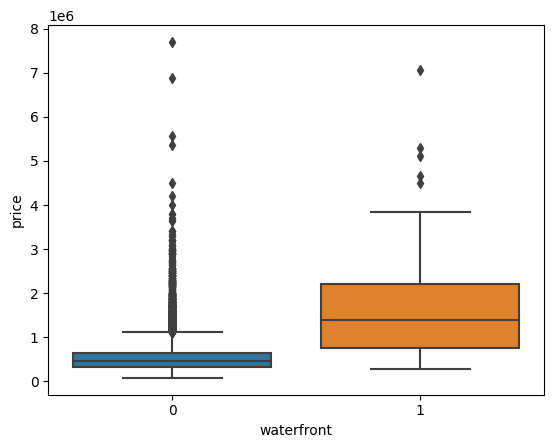

In [20]:
sns.boxplot(x='waterfront',y='price',data=df)

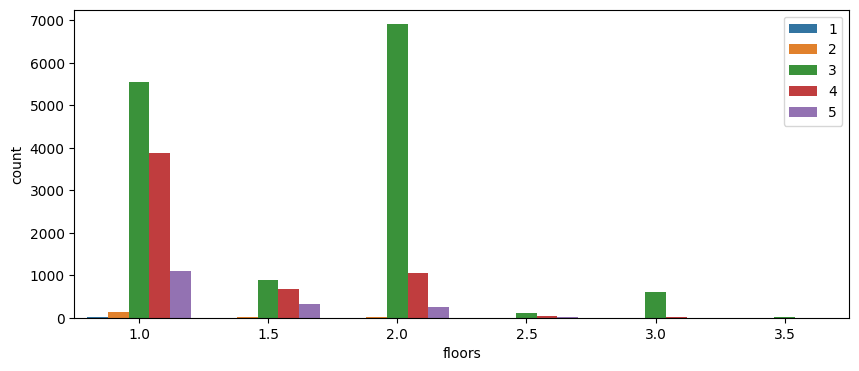

In [21]:
plt.figure (figsize=(10,4))
sns.countplot (x= df['floors'], hue = df['condition'])
plt.legend (loc ='best')

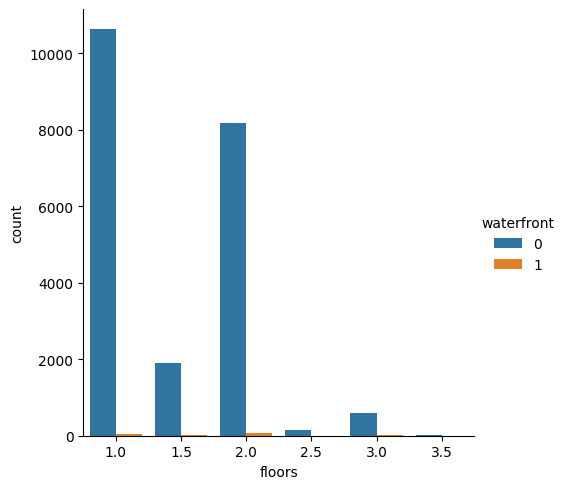

In [22]:
sns.catplot(x='floors', hue='waterfront', data=df, kind='count')

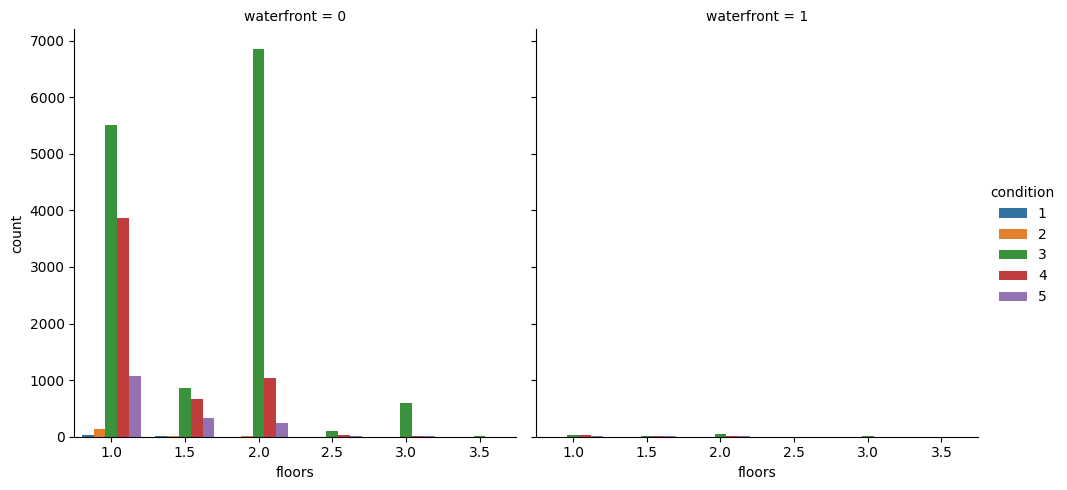

In [23]:
sns.catplot(x='floors',hue='condition',col='waterfront',data=df,kind='count')

In [24]:
#binning
df['price_category']=pd.cut(df['price'],bins=4,precision=0)
df['price_category']

0        (67375.0, 1981250.0]
1        (67375.0, 1981250.0]
2        (67375.0, 1981250.0]
3        (67375.0, 1981250.0]
4        (67375.0, 1981250.0]
                 ...         
21608    (67375.0, 1981250.0]
21609    (67375.0, 1981250.0]
21610    (67375.0, 1981250.0]
21611    (67375.0, 1981250.0]
21612    (67375.0, 1981250.0]
Name: price_category, Length: 21613, dtype: category
Categories (4, interval[float64, right]): [(67375.0, 1981250.0] < (1981250.0, 3887500.0] <
                                           (3887500.0, 5793750.0] < (5793750.0, 7700000.0]]

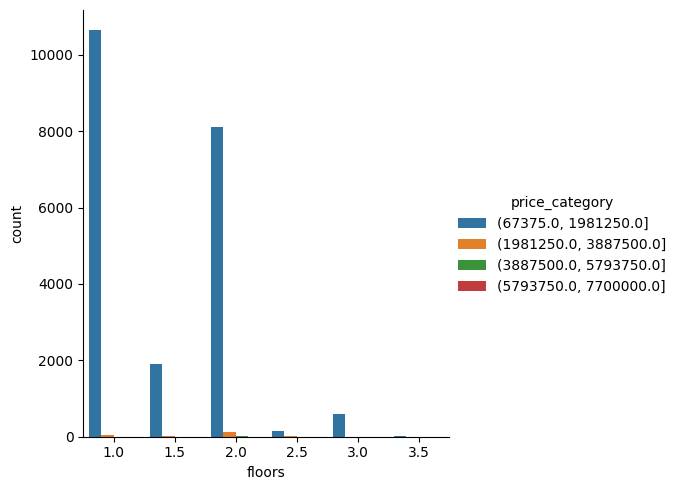

In [25]:
sns.catplot(x='floors',hue='price_category',data=df,kind='count')

In [26]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

Gunakan fungsi regplot pada seaborn library untuk menentukan apakah fitur sqft_above berkorelasi negatif atau positif terhadap price.

In [27]:
df["sqft_above"]

0        1180
1        2170
2         770
3        1050
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_above, Length: 21613, dtype: int64

(0.0, 8081250.0)

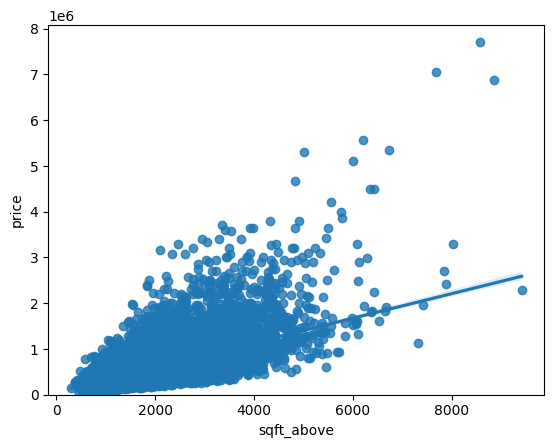

In [28]:
sns.regplot(x=df["sqft_above"],y=df["price"])
plt.ylim(0,)

In [29]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_category'],
      dtype='object')

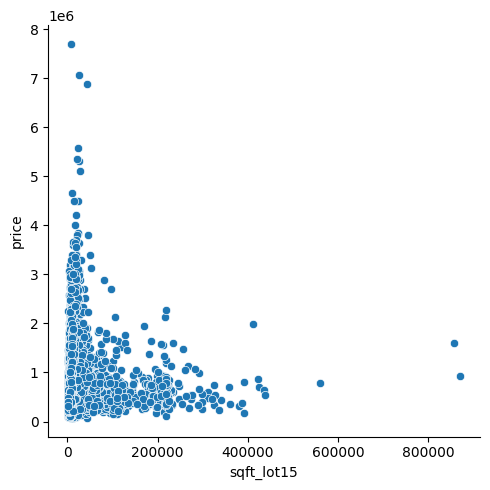

In [30]:
sns.relplot(x='sqft_lot15', y='price', data=df) #kita akan melakukan visualisasi terhadap data untuk melihat hubungan antara dua variabel

Kita dapat menggunakan metode corr() dari Pandas untuk menentukan fitur selain price yang paling berkorelasi dengan price.

In [31]:
# korelasi pearson product moment
df.corr()['price'].sort_values()

<ipython-input-31-8fa006bc661e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525752
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

##Prediction with Python - Part 2

### 5 Model Development

In [32]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"(67375.0, 1981250.0]"
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"(67375.0, 1981250.0]"
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"(67375.0, 1981250.0]"
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"(67375.0, 1981250.0]"
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"(67375.0, 1981250.0]"


In [33]:
df.shape

(21613, 23)

In [34]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_category'],
      dtype='object')

Kita dapat memakai model linear regression menggunakan fitur 'long' dan menghitung R^2.

In [35]:
df.corr()['price'].sort_values()

<ipython-input-35-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525752
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [36]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

2 varible (long dengan price ) tidak bagus digunakan , karena R2 < 1% yang artinya ada >99% lagi varians yang belum tercakup dalam model , sehingga tidak memungkinkan untuk memprediksi harga rumah berdasarkan longitude

Gunakan model linear regression untuk memprediksi 'price' dengan menggunakan fitur 'sqft_living' kemudian hitung R^2.

In [37]:
x=df[['sqft_living']]
y=df.price
lr=LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.4928532179037931

karena R2 sudah sekitar 50% varians yang telah tercakup dalam model (sehingga lebih memungkinkan untuk memprediksi harga berdasrkan sqft_living)

In [48]:
df['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

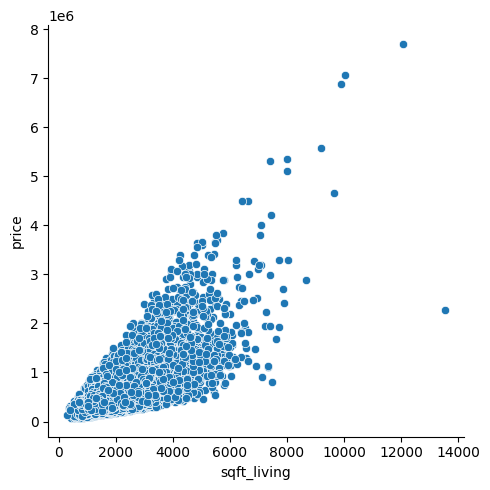

In [50]:
sns.relplot(x = 'sqft_living', y = 'price', data=df)

Menggunakan model Multi-linear regression untuk memprediksi 'price' menggunakan daftar fitur sbb:

In [52]:
df.corr()['price'].sort_values()

<ipython-input-52-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525752
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Kemudian hitung R^2.

In [39]:
x=df[features]
y=df.price
lr.fit(x,y)
lr.score(x,y)

0.6576540758612439

>Buatlah list of tuples, dengan elemen pertama dari tuple berisikan nama dari estimator:
>>'scale'

>>'polynomial'

>>'model'

>Dan elemen kedua dari tuple berisi model constructor

>>StandardScaler()

>>PolynomialFeatures(include_bias=False)

>>LinearRegression()

In [54]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Gunakan list tsb untuk membuat pipeline object untuk memprediksi 'price', fit object tsb menggunakan features di dalam list features, dan hitung R^2.

In [60]:
x = df[['sqft_living']]
y = df[['price']]
Ir = LinearRegression()
Ir.fit(x,y)
Ir.score(x,y)

0.4928532179037931

In [61]:
x = df[features]
y = df.price
Ir = LinearRegression()
Ir.fit(x,y)
Ir.score(x,y)

0.6576540758612439

In [55]:
x=df[features]
y=df.price
pipe=Pipeline(Input)
pipe.fit(x,y)
pipe.score(x,y)

0.7513470991001032

### 6 Model Evaluation and Refinement

Impor modules yang diperlukan:

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Kita akan membagi data menjadi training dan testing sets:

In [63]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Buatlah Ridge regression object menggunakan training data, set  regularization parameter menjadi 0.1, dan hitung R^2 menggunakan test data.

In [64]:
from sklearn.linear_model import Ridge

Linear least squares dengan l2 regularization.

Model ini merupakan solusi regression model dimana loss function merupakan fungsi linear least square dan regularization ditentukan oleh l2-norm. Yang juga dikenal sebagai Ridge Regression or Tikhonov regularization. Estimator ini memiliki built-in support untuk multi-variate regression (i.e., saat y merupakan 2d-array dari shape [n_samples, n_targets]).

In [45]:
rm=Ridge(alpha=0.1)
rm.fit(x_train,y_train)
rm.score(x_test,y_test)

0.6478987174225024

Lakukan transformasi second order polynomial pada training data dan testing data. Buatlah Ridge regression object menggunakan training data, set regularisation parameter menjadi 0.1, dan hitung R^2 menggunakan test data yang ada.

In [65]:
pr=PolynomialFeatures(degree=2) #second order polynomial
x_train_pr=pr.fit_transform(x_train) #train data
x_test_pr=pr.fit_transform(x_test) #test data

rr=Ridge(alpha=0.1) #Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
rr.fit(x_train_pr,y_train)
rr.score(x_test_pr,y_test)

0.7002860642434028

## Kesimpulan model yang cocok untuk permasalahan ini adalah menggunakan Polynomial